# The question to be answered/addressed in the below project--based on Twitter data--is, “Do Americans support U.S. President Donald Trump’s position in immigration and, specifically, what many cite as the separation of families as they try to enter cross the U.S. border? And do those opinions vary by geographic region?”


## First, we need to set up by installing the appropriate libraries and packages, authenticating, and establishing the Twitter API connection.

In [1]:
# importing the appropriate libraries and packages
import tweepy, json
from datetime import datetime, timedelta
import pandas as pd
import csv
from textblob import TextBlob
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [2]:
# my validation and authentication variables
access_token = " "
access_token_secret = " "
consumer_key = " "
consumer_secret = " "

In [3]:
# creating authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# connecting to the Twitter API using the above authentication
api = tweepy.API(auth)

##  The queries and analyses follow:

In [4]:
cities_data = {
    'Akron': {'region': 'Midwest', 'state': 'Ohio'},
    'Albuquerque': {'region': 'West', 'state': 'New Mexico'},
    'Anaheim': {'region': 'West', 'state': 'California'},
    'Anchorage': {'region': 'West', 'state': 'Alaska'},
    'Arlington': {'region': 'South', 'state': 'Texas'},
    'Atlanta': {'region': 'South', 'state': 'Georgia'},
    'Aurora': {'region': 'West', 'state': 'Colorado'},
    'Austin': {'region': 'South', 'state': 'Texas'},
    'Bakersfield': {'region': 'West', 'state': 'California'},
    'Baltimore': {'region': 'Northeast', 'state': 'Maryland'},
    'Baton Rouge': {'region': 'South', 'state': 'Louisiana'},
    'Birmingham': {'region': 'South', 'state': 'Alabama'},
    'Boston': {'region': 'Northeast', 'state': 'Massachusetts'},
    'Buffalo': {'region': 'Northeast', 'state': 'New York'},
    'Chandler': {'region': 'West', 'state': 'Arizona'}, 
    'Charlotte': {'region': 'South', 'state': 'North Carolina'},
    'Chesapeake': {'region': 'South', 'state': 'Virginia'},
    'Chicago': {'region': 'Northeast', 'state': 'Illinois'},
    'Chula Vista': {'region': 'West', 'state': 'California'},
    'Cincinnati': {'region': 'Midwest', 'state': 'Ohio'},
    'Cleveland': {'region': 'Midwest', 'state': 'Ohio'},
    'Colorado Springs': {'region': 'West', 'state': 'Colorado'},
    'Columbus': {'region': 'Northeast', 'state': 'Ohio'},
    'Corpus Christi': {'region': 'South', 'state': 'Texas'},
    'Dallas': {'region': 'South', 'state': 'Texas'},
    'Denver': {'region': 'West', 'state': 'Colorado'},
    'Detroit': {'region': 'Midwest', 'state': 'Michigan'},
    'Durham': {'region': 'South', 'state': 'North Carolina'},
    'El Paso': {'region': 'South', 'state': 'Texas'},
    'Fort Wayne': {'region': 'Midwest', 'state': 'Indiana'},
    'Fort Worth': {'region': 'South', 'state': 'Texas'},
    'Fremont': {'region': 'West', 'state': 'California'},
    'Fresno': {'region': 'West', 'state': 'California'},
    'Garland': {'region': 'South', 'state': 'Texas'},
    'Glendale': {'region': 'West', 'state': 'Arizona'},
    'Greensboro': {'region': 'South', 'state': 'North Carolina'},
    'Henderson': {'region': 'West', 'state': 'Nevada'},
    'Hialeah': {'region': 'South', 'state': 'Florida'},
    'Honolulu': {'region': 'West', 'state': 'Hawaii'},
    'Houston': {'region': 'South', 'state': 'Texas'},
    'Indianapolis': {'region': 'Midwest', 'state': 'Indianapolis'},
    'Jacksonville': {'region': 'South', 'state': 'Florida'},
    'Jersey City': {'region': 'Northeast', 'state': 'New Jersey'},
    'Kansas City': {'region': 'Midwest', 'state': 'Missouri'},
    'Laredo': {'region': 'South', 'state': 'Texas'},
    'Las Vegas': {'region': 'West', 'state': 'Nevada'},
    'Lexington-Fayette': {'region': 'South', 'state': 'Kentucky'},
    'Lincoln': {'region': 'Midwest', 'state': 'Nebraska'},
    'Long Beach': {'region': 'West', 'state': 'California'},
    'Los Angeles': {'region': 'West', 'state': 'California'},
    'Louisville': {'region': 'South', 'state': 'Kentucky'},
    'Lubbock': {'region': 'South', 'state': 'Texas'},
    'Madison': {'region': 'Midwest', 'state': 'Wisconsin'},
    'Memphis': {'region': 'South', 'state': 'Tennessee'},
    'Mesa': {'region': 'West', 'state': 'Arizona'},
    'Miami': {'region': 'South', 'state': 'Florida'},
    'Milwaukee': {'region': 'Midwest', 'state': 'Wisconsin'},
    'Minneapolis': {'region': 'Midwest', 'state': 'Minnesota'},
    'Modesto': {'region': 'West', 'state': 'California'},
    'Montgomery': {'region': 'South', 'state': 'Alabama'},
    'Nashville': {'region': 'South', 'state': 'Tennessee'},
    'New Orleans': {'region': 'South', 'state': 'Louisiana'},
    'New York': {'region': 'Northeast', 'state': 'New York'},
    'Newark': {'region': 'Northeast', 'state': 'New Jersey'},
    'Norfolk': {'region': 'South', 'state': 'Virginia'},
    'Oakland': {'region': 'West', 'state': 'California'},
    'Oklahoma City': {'region': 'South', 'state': 'Oklahoma'},
    'Omaha': {'region': 'Midwest', 'state': 'Nebraska'},
    'Orlando': {'region': 'South', 'state': 'Florida'},
    'Philadelphia': {'region': 'Northeast', 'state': 'Pennsylvania'},
    'Phoenix': {'region': 'West', 'state': 'Arizona'},
    'Pittsburgh': {'region': 'Northeast', 'state': 'Pennsylvania'},
    'Plano': {'region': 'South', 'state': 'Texas'},
    'Portland': {'region': 'West', 'state': 'Oregon'},
    'Raleigh': {'region': 'South', 'state': 'North Carolina'},
    'Reno': {'region': 'West', 'state': 'Nevada'},
    'Riverside': {'region': 'West', 'state': 'California'},
    'Rochester': {'region': 'Northeast', 'state': 'New York'},
    'Sacramento': {'region': 'West', 'state': 'California'},
    'San Antonio': {'region': 'South', 'state': 'Texas'},
    'San Diego': {'region': 'West', 'state': 'California'},
    'San Francisco': {'region': 'West', 'state': 'California'},
    'San Jose': {'region': 'West', 'state': 'California'},
    'Santa Ana': {'region': 'West', 'state': 'California'},
    'Scottsdale': {'region': 'West', 'state': 'Arizona'},
    'Seattle': {'region': 'West', 'state': 'Washington'},
    'Shreveport': {'region': 'South', 'state': 'Louisiana'},
    'St. Louis': {'region': 'Midwest', 'state': 'Missouri'},
    'St. Paul': {'region': 'Midwest', 'state': 'Minnesota'},
    'St. Petersburg': {'region': 'South', 'state': 'Florida'},
    'Stockton': {'region': 'West', 'state': 'California'},
    'Tampa': {'region': 'South', 'state': 'Florida'},
    'Toledo': {'region': 'Midwest', 'state': 'Ohio'},
    'Tucson': {'region': 'West', 'state': 'Arizona'},
    'Tulsa': {'region': 'South', 'state': 'Oklahoma'},
    'Virginia Beach': {'region': 'South', 'state': 'Virginia'},
    'Washington': {'region': 'Northeast', 'state': 'District of Columbia'},
    'Wichita': {'region': 'Midwest', 'state': 'Kansas'},
}

In [5]:
# function to convert the dictionary to a DataFrame

def toDataFrame(tweets):
    #this function selects specific values/columns from the original JSON and adds them as DataFrame columns.
    df = pd.DataFrame()
    df['tweetID'] = [tweet.id for tweet in tweets]
    df['tweetText'] = [tweet.text for tweet in tweets]
    df['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    df['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    df['tweetSource'] = [tweet.source for tweet in tweets]
    df['tweetCreated'] = [tweet.created_at for tweet in tweets]
    df['userID'] = [tweet.user.id for tweet in tweets]
    df['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    df['userName'] = [tweet.user.name for tweet in tweets]
    df['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    df['userDesc'] = [tweet.user.description for tweet in tweets]
    df['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    df['userFollowingCt'] = [tweet.user.friends_count for tweet in tweets]
    #df['userLocation'] = [tweet.user.location for tweet in tweets]
    df['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    df['coordinates'] = [tweet.coordinates for tweet in tweets]
    df['geolocation'] = [tweet.geo for tweet in tweets]
    df['place'] = [tweet.place for tweet in tweets]
    return df

In [6]:
# the actual query string to search for these phrases of interested contained in the tweet text

q = '(immigration OR immigrants) AND (families OR family) AND (separate OR separation) AND trump)'

In [7]:
tweets_df = pd.DataFrame() # initialize an empty global dataframe
for city, city_data in cities_data.items():

    # get the city ID
    city_id = api.geo_search(query = city, wait_on_rate_limit=True, granularity = 'city')[0].id
    cities_data[city]['id'] = city_id # add it to cities_data dictionary in case we need it later

    # retrieve 500 tweets posted from this city
    city_tweets = []
    for tweet in tweepy.Cursor(api.search, q=q + '-filter:retweets', contained_within=city_id, wait_on_rate_limit=True, lang="en").items(500):    
        city_tweets.append(tweet)
    
    city_tweets_df = toDataFrame(city_tweets) # convert the tweets list into a dataframe
    city_tweets_df['city'] = city # add the city column
    city_tweets_df['state'] = city_data['state'] # add the state column
    city_tweets_df['region'] = city_data['region'] # add the region column
    
    # append this dataframe to the global dataframe
    tweets_df = tweets_df.append(city_tweets_df, ignore_index=True)

In [8]:
cities_data

{'Akron': {'id': 'fef01a8cb0eacb64', 'region': 'Midwest', 'state': 'Ohio'},
 'Albuquerque': {'id': '813a485b26b8dae2',
  'region': 'West',
  'state': 'New Mexico'},
 'Anaheim': {'id': '0c2e6999105f8070',
  'region': 'West',
  'state': 'California'},
 'Anchorage': {'id': '7a863bb88e5bb33c', 'region': 'West', 'state': 'Alaska'},
 'Arlington': {'id': '319ee7b36c9149da', 'region': 'South', 'state': 'Texas'},
 'Atlanta': {'id': '8173485c72e78ca5', 'region': 'South', 'state': 'Georgia'},
 'Aurora': {'id': '249bc600a1b6bb6a', 'region': 'West', 'state': 'Colorado'},
 'Austin': {'id': 'c3f37afa9efcf94b', 'region': 'South', 'state': 'Texas'},
 'Bakersfield': {'id': '960993b9cfdffda9',
  'region': 'West',
  'state': 'California'},
 'Baltimore': {'id': 'c0b8e8dc81930292',
  'region': 'Northeast',
  'state': 'Maryland'},
 'Baton Rouge': {'id': 'c7ef5f3368b68777',
  'region': 'South',
  'state': 'Louisiana'},
 'Birmingham': {'id': '53b67b1d1cc81a51',
  'region': 'South',
  'state': 'Alabama'},
 'Bos

In [9]:
tweets_df.head()

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFollowingCt,userTimezone,coordinates,geolocation,place,city,state,region
0,1033362402346237952,@sandra8301 Obama separated families who were ...,0,0,Twitter Lite,2018-08-25 14:36:10,972261721938317318,Jacquel46373869,Lanyeka,2018-03-10 00:03:53,,284,362,None,None,None,None,Akron,Ohio,Midwest
1,1033248089002438656,Union-Tribune ▶ Trump administration appeals j...,0,0,IFTTT,2018-08-25 07:01:55,26678989,SDNewsfeed,SD Newsfeed,2009-03-26 03:29:22,"The San Diego news agglomerator, from editor @...",2072,245,None,None,None,None,Akron,Ohio,Midwest
2,1033241475071569920,Detaining Immigrant Kids Is Now a Billion-Doll...,0,0,Facebook,2018-08-25 06:35:39,18891341,bonesjones1,BONES JONES,2009-01-12 04:29:23,International Artist/Musician/Producer/Publish...,756,1935,None,None,None,None,Akron,Ohio,Midwest
3,1033219597141344257,"@LauraLoomer And let's not forget, the issue o...",0,1,Twitter Web Client,2018-08-25 05:08:42,157211888,dhjewels,BaoBei,2010-06-19 04:44:41,Gemstone specialist.,248,798,None,None,None,None,Akron,Ohio,Midwest
4,1033214216281317376,It's hard to watch the results of separation o...,0,0,Twitter Web Client,2018-08-25 04:47:20,828296542456934400,willyloo1234,Will Loo,2017-02-05 17:37:39,All my opinions don't read if you disagree.,436,1666,None,None,None,None,Akron,Ohio,Midwest


### Sentiment analysis

In [10]:
def clean_tweet(tweet):
    # a function that cleans the text of each tweet by removing removing links and special characters using regex.
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [11]:
def sentiment(tweet):
    # a function to analyze the sentiment of each tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'netural'
    else:
        return 'negative'

In [12]:
# creat a new column in our DataFrame with the sentiment
tweets_df['sentiment'] = np.array([sentiment(tweet) for tweet in tweets_df['tweetText'] ])

In [13]:
tweets_df.head()

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,...,userFollowerCt,userFollowingCt,userTimezone,coordinates,geolocation,place,city,state,region,sentiment
0,1033362402346237952,@sandra8301 Obama separated families who were ...,0,0,Twitter Lite,2018-08-25 14:36:10,972261721938317318,Jacquel46373869,Lanyeka,2018-03-10 00:03:53,...,284,362,None,None,None,None,Akron,Ohio,Midwest,negative
1,1033248089002438656,Union-Tribune ▶ Trump administration appeals j...,0,0,IFTTT,2018-08-25 07:01:55,26678989,SDNewsfeed,SD Newsfeed,2009-03-26 03:29:22,...,2072,245,None,None,None,None,Akron,Ohio,Midwest,netural
2,1033241475071569920,Detaining Immigrant Kids Is Now a Billion-Doll...,0,0,Facebook,2018-08-25 06:35:39,18891341,bonesjones1,BONES JONES,2009-01-12 04:29:23,...,756,1935,None,None,None,None,Akron,Ohio,Midwest,netural
3,1033219597141344257,"@LauraLoomer And let's not forget, the issue o...",0,1,Twitter Web Client,2018-08-25 05:08:42,157211888,dhjewels,BaoBei,2010-06-19 04:44:41,...,248,798,None,None,None,None,Akron,Ohio,Midwest,netural
4,1033214216281317376,It's hard to watch the results of separation o...,0,0,Twitter Web Client,2018-08-25 04:47:20,828296542456934400,willyloo1234,Will Loo,2017-02-05 17:37:39,...,436,1666,None,None,None,None,Akron,Ohio,Midwest,negative


### Further Exploratory Data Analysis

#### The number and percentage of “positive”, “negative”, and “neutral” tweets to be interesting. Specifically, there were far more “neutral” tweets (55.7%) than “negative” (29.2%) and “positive” (15%) tweets, as one can see in the following figures and bar chart:

In [14]:
tweets_df.sentiment.value_counts()

netural     26840
negative     8499
positive     6062
Name: sentiment, dtype: int64

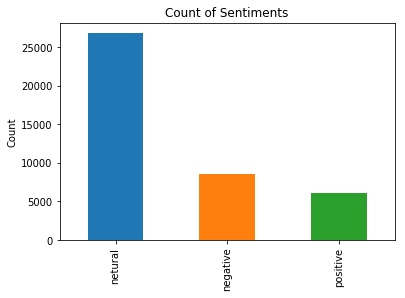

In [15]:
tweets_df.sentiment.value_counts().plot(kind='bar', title = 'Count of Sentiments')
plt.ylabel('Count')
plt.show()

In [16]:
tweets_df.sentiment.value_counts()/len(tweets_df)

netural     0.648294
negative    0.205285
positive    0.146422
Name: sentiment, dtype: float64

#### As one can see, there were more overall tweets from the South and West. The percentages of “neutral”, “negative”, and “positive” by region was consistent with the overall percentages mentioned above. By comparing within region percentages, one can see that the West region had the highest percentages of “negative” tweets and “positive” tweets with the lowest percentage of “neutral” tweets. The Midwest region had the lowest percentage of “positive” tweets.

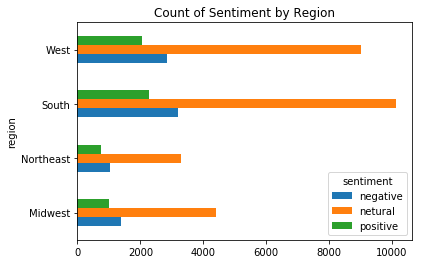

In [17]:
tweets_df.groupby('sentiment').region.value_counts().unstack(0).plot.barh(title = 'Count of Sentiment by Region')


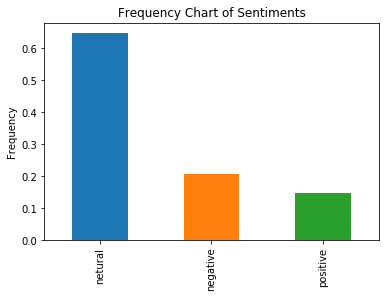

In [18]:
pd.Series(tweets_df.sentiment.value_counts()/len(tweets_df)).plot(kind='bar', title = 'Frequency Chart of Sentiments')
plt.ylabel('Frequency')
plt.show()

In [19]:
sents=tweets_df.groupby('sentiment')

In [20]:
sents.region.value_counts()

sentiment  region   
negative   South         3210
           West          2859
           Midwest       1390
           Northeast     1040
netural    South        10138
           West          9015
           Midwest       4399
           Northeast     3288
positive   South         2290
           West          2038
           Midwest        990
           Northeast      744
Name: region, dtype: int64

In [21]:
len(tweets_df.loc[tweets_df['region']=='West'])

13912

In [22]:
westdf = tweets_df.loc[tweets_df['region']=='West']

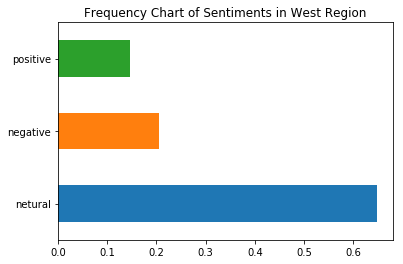

In [23]:
pd.Series(westdf.sentiment.value_counts()/len(westdf)).plot.barh(title = 'Frequency Chart of Sentiments in West Region')


In [24]:
len(tweets_df.loc[tweets_df['region']=='South'])

15638

In [25]:
southdf = tweets_df.loc[tweets_df['region']=='South']

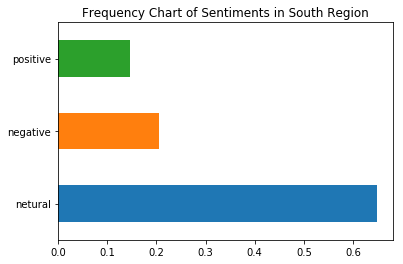

In [26]:
pd.Series(southdf.sentiment.value_counts()/len(southdf)).plot.barh(title = 'Frequency Chart of Sentiments in South Region')


In [27]:
len(tweets_df.loc[tweets_df['region']=='Midwest'])

6779

In [28]:
midwestdf = tweets_df.loc[tweets_df['region']=='Midwest']

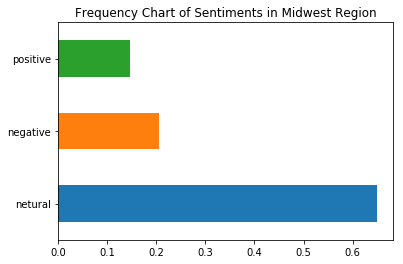

In [29]:
pd.Series(midwestdf.sentiment.value_counts()/len(midwestdf)).plot.barh(title = 'Frequency Chart of Sentiments in Midwest Region')


In [30]:
len(tweets_df.loc[tweets_df['region']=='Northeast'])

5072

In [31]:
northeastdf = tweets_df.loc[tweets_df['region']=='Northeast']

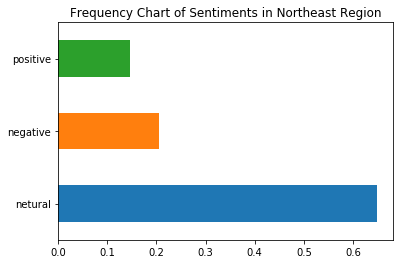

In [32]:
pd.Series(northeastdf.sentiment.value_counts()/len(northeastdf)).plot.barh(title = 'Frequency Chart of Sentiments in Northeast Region')


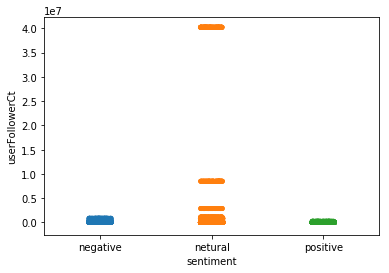

In [33]:
sns.stripplot(x = 'sentiment', y = 'userFollowerCt', data = tweets_df, jitter=True)

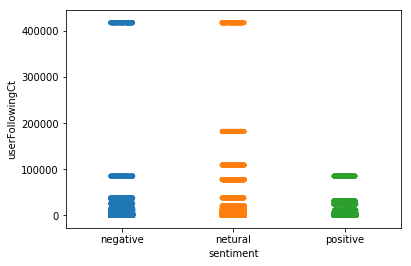

In [34]:
sns.stripplot(x = 'sentiment', y = 'userFollowingCt', data = tweets_df, jitter=True)

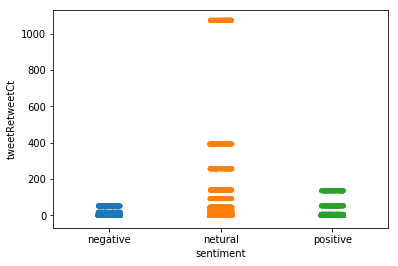

In [35]:
sns.stripplot(x = 'sentiment', y = 'tweetRetweetCt', data = tweets_df, jitter=True)

#### Additionally, as one can see in the following chart, the number of Twitter followers is positively correlated with the number being followed. The relationship is even stronger among those with “negative” sentiments about the President’s immigration position.

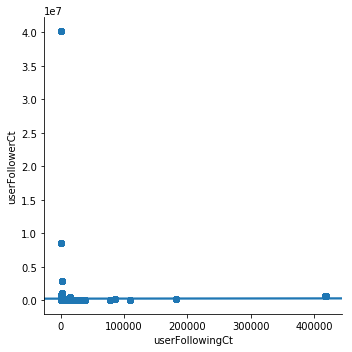

In [36]:
sns.lmplot(x='userFollowingCt', y='userFollowerCt',data=tweets_df)

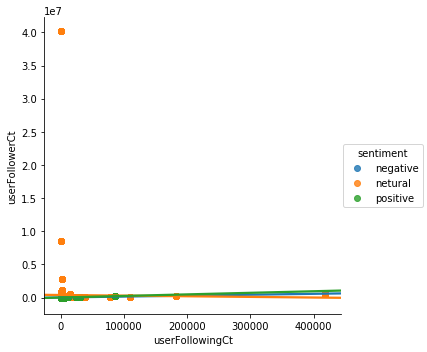

In [37]:
sns.lmplot(x='userFollowingCt', y='userFollowerCt', hue='sentiment',data=tweets_df)

In [38]:
# function for ECDF (Empirical Cumulative Distribution Function)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

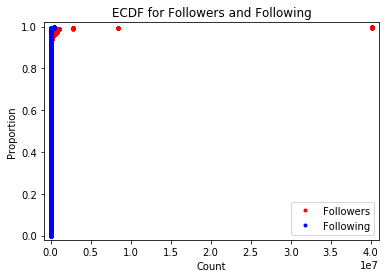

In [39]:
followers_x, followers_y = ecdf(tweets_df.userFollowerCt)
following_x, following_y = ecdf(tweets_df.userFollowingCt)

plt.plot(followers_x, followers_y, marker = '.', linestyle='none', color='red')
plt.plot(following_x, following_y, marker = '.', linestyle='none', color='blue')

plt.margins(0.02)
plt.xlabel('Count')
plt.ylabel('Proportion')
plt.legend(('Followers', 'Following'), loc=4)
plt.title('ECDF for Followers and Following')
plt.show()

In [40]:
tweets_df.corr()

,tweetID,tweetRetweetCt,tweetFavoriteCt,userID,userFollowerCt,userFollowingCt
tweetID,1.000000,0.019082,0.010913,-0.033197,0.013023,0.008245
tweetRetweetCt,0.019082,1.000000,0.978173,-0.058637,0.716200,0.014395
tweetFavoriteCt,0.010913,0.978173,1.000000,-0.042436,0.766883,-0.008422
userID,-0.033197,-0.058637,-0.042436,1.000000,-0.045871,-0.083854
userFollowerCt,0.013023,0.716200,0.766883,-0.045871,1.000000,0.001051
userFollowingCt,0.008245,0.014395,-0.008422,-0.083854,0.001051,1.000000


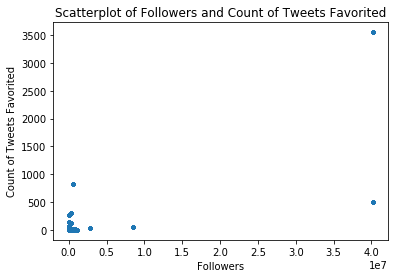

In [41]:
plt.plot(tweets_df.userFollowerCt, tweets_df.tweetFavoriteCt, linestyle='none', marker='.')
plt.xlabel('Followers')
plt.ylabel('Count of Tweets Favorited')
plt.title('Scatterplot of Followers and Count of Tweets Favorited')
plt.show()

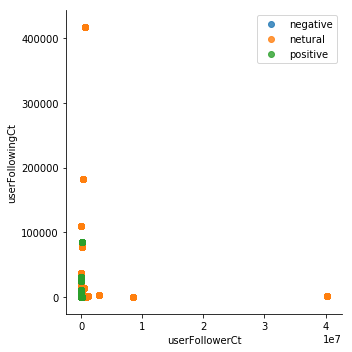

In [42]:
sns.lmplot( x="userFollowerCt", y="userFollowingCt", data=tweets_df, fit_reg=False, hue='sentiment', legend=False)
plt.legend(loc='upper right')
 
plt.show()